# Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mycolorpy

In [ ]:
pip install vformer

In [3]:
import shutil
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from matplotlib.colors import ListedColormap
from mycolorpy import colorlist as mcp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import torch
from vformer.models.classification import CCT
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler,
                              TensorDataset)
import torch
from torchvision import transforms
from PIL import Image
convert_tensor = transforms.ToTensor()

Importing a sample video from the dataset

In [ ]:
pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1_7lbdZGC5EsN7o2u2LEdKNqseB85AC4l

In [ ]:
# !wget https://labyrinth01.inf.um.es/downloads/GSoC_2022_Multimodal_DATASET.tgz

# Open Pose

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  # !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`


In [ ]:
def with_moviepy(filename):
    from moviepy.editor import VideoFileClip
    clip = VideoFileClip(filename)
    duration       = clip.duration
    fps            = clip.fps
    return duration

In [ ]:
# import shutil
# shutil.copy("/content/drive/MyDrive/GSoC_DATASET/Demarcative/from_beginning_to_end/2006-02-14_1400_US_WWW_Democracy_Now_2153-2159_ID924_from_beginning_to_end.mp4","/content/youtube.mp4")

In [ ]:
duration= int(with_moviepy("/content/drive/MyDrive/GSoC_DATASET/Demarcative/from_beginning_to_end/2006-02-14_1400_US_WWW_Democracy_Now_2153-2159_ID924_from_beginning_to_end.mp4"))
print(f"The total duration of the given video is {duration} seconds")

The total duration of the given video is 6 seconds


In [ ]:
path = "/content/drive/MyDrive/GSoC_DATASET/Sequential/previously/"
all = os.listdir(path)

In [ ]:
len(all)

128

In [ ]:
for i,data in enumerate(all):
  all[i] = path + data

In [ ]:
%%time
for i,data in tqdm(enumerate(all)):
  j = i
  start_time=0
  duration= int(with_moviepy(data))
  path = "/content/drive/MyDrive/GSOC_JSON/Sequential/clip" + str(j) + "/"

  !ffmpeg -y -loglevel info -ss $start_time -t $duration -i $data /content/clip.mp4
  # # detect poses on the these 10 seconds
  !cd openpose && ./build/examples/openpose/openpose.bin --face --hand --video ../clip.mp4 --write_json $path --display 0  --write_video /content/clip_openpose.avi --keypoint_scale 3 --num_gpu -1 --model_pose BODY_25 --part_candidates
  # convert the result into MP4
  os.remove("/content/clip.mp4")
  os.remove("/content/clip_openpose.avi")

In [ ]:
path = "/content/"
list_all = os.listdir("/content/")
for i in list_all:
  if("clip") in i:
    path_temp = path + i
    path_to = "/content/drive/MyDrive/GSOC_JSON/" + i
    shutil.copytree(path_temp,path_to)

In [ ]:
for i,data in tqdm(enumerate(all[:1])):
  start_time=0
  duration= int(with_moviepy(data))
  print(f"The duration of the clip is {duration}")
  print(data)
  path_save = "/content/clip" + str(i) + ".mp4"

  !ffmpeg -y -loglevel info -ss $start_time -t $duration -i data path_save
  # # detect poses on the these 10 seconds
  !cd openpose && ./build/examples/openpose/openpose.bin --face --hand --video path_save --write_json /content/clip/ --display 0 --keypoint_scale 3 --num_gpu -1 --model_pose BODY_25 --part_candidates

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('/content/drive/MyDrive/GSoC_DATASET/Deictic/back_then/2004-08-05_1300_US_WWW_Democracy_Now_994-998_ID171_back_then.mp4', width=960, height=720)


In [ ]:
# Code to seperate the frame from the video
# !rm openpose/images/video_out*.png
# !mkdir openpose/output_images/
# !cd openpose && ffmpeg -ss 0 -t 6 -i /content/youtube.mp4 ./output_images/out%05d.png -vf fps=30

In [ ]:
mkdir videoJSON

In [ ]:
shutil.copytree("/content/clip","/content/videoJSON/clip/")

'/content/videoJSON/clip/'

# ParselMouth

In [ ]:
!git clone https://github.com/uzaymacar/simple-speech-features.git

Cloning into 'simple-speech-features'...
remote: Enumerating objects: 44, done.
remote: Total 44 (delta 0), reused 0 (delta 0), pack-reused 44
Unpacking objects: 100% (44/44), done.


In [ ]:
cd simple-speech-features/

/content/simple-speech-features


In [ ]:
import pandas as pd

!pip install praat-parselmouth
import parselmouth

from feature_extraction_utils import *

import wave, sys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.7 MB 19.8 MB/s 


In [ ]:
cd ..

/content


In [ ]:
!ffmpeg -i /content/youtube.mp4 -q:a 0 -map a /content/output.wav 

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
def extract_content(path):
  fps = 1/29.97
  sound = parselmouth.Sound('/content/output.wav')
  df = pd.DataFrame()

  attributes = {}
  intensity_second_wise = []
  pitch_second_wise = []

  intensity_attributes1 = get_intensity_attributes(sound,time_step=fps,return_values=True)
  pitch_attributes1 = get_pitch_attributes(sound,time_step=fps,return_values=True)

  intensity_attributes = intensity_attributes1[0]
  pitch_attributes = pitch_attributes1[0]

  intensity_attributes2 = intensity_attributes1[1]
  pitch_attributes2 = pitch_attributes1[1]

  attributes.update(intensity_attributes)
  attributes.update(pitch_attributes)

  intensity_second_wise.append(intensity_attributes2)
  pitch_second_wise.append(pitch_attributes2)

  hnr_attributes = get_harmonics_to_noise_ratio_attributes(sound,time_step=fps)[0]
  gne_attributes = get_glottal_to_noise_ratio_attributes(sound)[0]
  attributes.update(hnr_attributes)
  attributes.update(gne_attributes)

  df['local_jitter'] = None
  df['local_shimmer'] = None
  df.at[0, 'local_jitter'] = get_local_jitter(sound)
  df.at[0, 'local_shimmer'] = get_local_shimmer(sound)

  spectrum_attributes = get_spectrum_attributes(sound)[0]
  attributes.update(spectrum_attributes)

  formant_attributes = get_formant_attributes(sound,time_step=fps)[0]
  attributes.update(formant_attributes)

  lfcc_matrix, mfcc_matrix = get_lfcc(sound,time_step=fps), get_mfcc(sound,time_step=fps)
  df['lfcc'] = None
  df['mfcc'] = None
  df.at[0, 'lfcc'] = lfcc_matrix
  df.at[0, 'mfcc'] = mfcc_matrix

  delta_mfcc_matrix = get_delta(mfcc_matrix)
  delta_delta_mfcc_matrix = get_delta(delta_mfcc_matrix)
  df['delta_mfcc'] = None
  df['delta_delta_mfcc'] = None
  df.at[0, 'delta_mfcc'] = delta_mfcc_matrix
  df.at[0, 'delta_delta_mfcc'] = delta_delta_mfcc_matrix

  for attribute in attributes:
      df.at[0, attribute] = attributes[attribute]
      
  # df.at[0, 'sound_filepath'] = sound_filepath
  rearranged_columns = df.columns.tolist()[-1:] + df.columns.tolist()[:-1]
  df = df[rearranged_columns]

  return df, intensity_second_wise, pitch_second_wise

In [ ]:
df, intensity_second_wise, pitch_second_wise = extract_content("/content/youtube.mp4")

In [ ]:
len(intensity_second_wise[0])

88

In [ ]:
len(pitch_second_wise[0])

90

In [ ]:
df.columns

Index(['vtl_delta_f', 'local_jitter', 'local_shimmer', 'lfcc', 'mfcc',
       'delta_mfcc', 'delta_delta_mfcc', 'min_intensity',
       'relative_min_intensity_time', 'max_intensity',
       'relative_max_intensity_time', 'mean_intensity', 'stddev_intensity',
       'q1_intensity', 'median_intensity', 'q3_intensity', 'voiced_fraction',
       'min_pitch', 'relative_min_pitch_time', 'max_pitch',
       'relative_max_pitch_time', 'mean_pitch', 'stddev_pitch', 'q1_pitch',
       'q3_pitch', 'mean_absolute_pitch_slope',
       'pitch_slope_without_octave_jumps', 'min_hnr', 'relative_min_hnr_time',
       'max_hnr', 'relative_max_hnr_time', 'mean_hnr', 'stddev_hnr', 'min_gne',
       'max_gne', 'mean_gne', 'stddev_gne', 'sum_gne', 'band_energy',
       'band_density', 'band_energy_difference', 'band_density_difference',
       'center_of_gravity_spectrum', 'stddev_spectrum', 'skewness_spectrum',
       'kurtosis_spectrum', 'central_moment_spectrum', 'f1_mean', 'f2_mean',
       'f3_mean', '

In [ ]:
print(f"The frame wise intensity is {intensity_second_wise}")

The frame wise intensity is [[0.0, 51.171858003637794, 51.04812800564383, 70.4457147805014, 70.11365067550616, 63.92296410784869, 63.27139025976389, 67.23579060770602, 71.5401771074944, 69.98059346879978, 71.18604822245034, 68.19327519002121, 55.090250296169316, 62.09092696778805, 69.51450299522287, 70.16708061941428, 71.11761072038868, 71.09137154870795, 66.8807205572579, 54.33997505302209, 51.45821615597734, 60.13566517197666, 71.63304146222042, 69.73178823305855, 68.94801501297101, 69.07590385547695, 69.88008257991655, 66.9458724202368, 69.67928458499922, 66.21689609248638, 62.67978124251818, 63.26347980027541, 69.60149488813144, 69.0234920426026, 68.32116883065385, 63.38555464110379, 44.871927175148585, 53.00606820715129, 64.80626501941117, 70.1501401831331, 65.1817155984121, 53.22523324526547, 48.886108565580585, 66.70945548853689, 71.26126844495273, 70.90524089731119, 71.01280451080196, 66.86144588075734, 63.39100186888843, 69.94301125253341, 65.43983236130177, 50.133390780508016

In [ ]:
print(f"The frame wise pitch is {pitch_second_wise}")

The frame wise pitch is [[0.0, 165.2575325210995, 119.43850944439548, 0.0, 146.84343570185496, 143.05287416760558, 142.48464335425845, 148.43450142865882, 167.8328352708336, 219.18277214368715, 265.0857276893456, 282.48248688556095, 273.07444089705126, 257.88679128935553, 190.3171660874647, 191.73421793340313, 171.34744548728963, 158.53578162637612, 152.52495665470698, 144.45256345751864, 121.10171402609157, 108.97812190342647, 0.0, 131.7582636901433, 127.23927463446812, 127.28085060583585, 132.97409465274063, 146.93649018710744, 166.61009646306968, 177.17320551534445, 178.45923951957639, 157.4582276696907, 134.41557884148463, 138.09846899489136, 149.17506718123724, 174.36446981484627, 0.0, 0.0, 0.0, 193.32361323395807, 186.04670920447805, 167.12182965476552, 0.0, 0.0, 190.57439386893847, 192.55987943519423, 189.8553527527032, 182.8626066728062, 174.68477645559636, 162.74920341495633, 156.3318495272434, 143.89314196445773, 0.0, 0.0, 0.0, 219.69624578872012, 238.234718896223, 249.678243

# Running R Code - Brian

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
dfMaker <- function(video.folders,save.csv=F, output.folder,return.empty=F) {
  
  
  video.folders <- list.dirs(video.folders, full.names=TRUE,recursive = F)
  # print(video.folders)
  
  
  videoMaker<<- function(video.folders,output.folder,save.csv,return.empty,value) {
      
    
    
    
    files<-list.files(video.folders, pattern="*.json", full.names=TRUE)
    
    
    out=NULL
    emptyFrames=NULL
    
    
    
    frameMaker<<-function(file){
        
      require(jsonlite)
      
      
      rawData<-read_json( path = file)
      
            
      rawData<-rawData[2]
      
      rawData<-rawData[[1]]
      
      dfPoints=NULL
      
      for (id in 1:length(rawData)) {
        
        if(length(rawData)!=0) {
          
          points<-data.frame(unlist(rawData[[id]]),people=id)
          
          dfPoints=rbind(dfPoints,points) }else{
            
            empty<-paste(file)
            
            
          }}
      
      
      
      pattern<- sample(T, size=137*3, replace= T) # points triplicates
      
      
      pattern<-c(F,pattern)
      
      
      if(!is.null(dfPoints)){
        pattern<-rep(pattern, times=max(dfPoints$people))
      }  
      
      
      
      dfPoints<-dfPoints[pattern,]
      ##
      
      type<-rownames(dfPoints)
      type<-gsub("_2d[0-9]*", "", type)
      
      ###
      words<-gsub("_0000.*", "", file)
      
      
      words<-gsub(".*[0-9]_", "", words)
      
      
      ###
      
      frame<-gsub(paste(".*_000", sep = ""), "", file)
      
      frame<-as.numeric(gsub("_.*","", frame))
      ###
      
      name<-gsub(paste("_",words,".*", sep = ""), "", file)
      name<-gsub(paste(".*/",sep = ""), "", name)
      
      ###
      
      
      triplet<-c(T,F,F)
      ###
      groups <- c("x", "y", "c") # the variables of the final df
      if(!is.null(dfPoints)){
          
        pointsDF<-data.frame(split(dfPoints[,1], f = groups), 
                             people=dfPoints$people[triplet],
                             typePoint=  type[triplet],
                             point= c(0:24,0:69,0:20,0:20),
                             words=words,
                             frame=frame,
                             name=name) # split in 3 columns 
                             
        return(pointsDF)
      }else{
          
        return(empty)
      }
      
      
    }
    
    
    
    for (i in 1:length(files)){
      
      c <- data.frame(frameMaker(files[i]))
      
      
      if (length(c)!=1) {
        out=rbind(out,c)
      }else{
        
        emptyFrames=rbind(emptyFrames,c)
      }
      
      
      
      
    }
    
    if (save.csv==T) {
        
      folder<-output.folder
      dir.create(folder,recursive = T)
      print(value)
      write.csv(x = out, paste(folder,"/",value,".csv",sep = ""),row.names = F)
      # write.csv(x = out, paste(folder,"/","files",".csv",sep = ""),row.names = F)
    }
    
    if (return.empty==T) {
      video<-list(out,emptyFrames)
      return(video)
    }else{
      return(out)
    }
    
    
    
    
  }
  
  
  result=NULL
  dFinal<-NULL
  totalEmpty<-NULL
  
  for (i in 1:(length(video.folders))) {

    
    dfVideo<-videoMaker( video.folders[i],save.csv = save.csv,output.folder = output.folder,return.empty = return.empty, value = i )
  
    if (return.empty==F) {
      
      result=rbind(result,dfVideo)
    }else{
      
      dFinal=rbind(dFinal,dfVideo[[1]])
      totalEmpty=rbind(totalEmpty,dfVideo[[2]])
      result<-list(dFinal,totalEmpty)
      
    }
    
    
  }
  
  return(result)
}

result = dfMaker("/content/drive/MyDrive/GSOC_JSON/Sequential/",save.csv = T,return.empty = T,output.folder = "/content/drive/MyDrive/GSOC_CSV/Sequential")


# Cleaning the CSV Files

In [ ]:
list_files = os.listdir("/content/drive/MyDrive/GSOC_CSV/Sequential")

In [4]:
def remove_dupli(df):
  vals = []
  index_drop = []
  for i in range(len(df)):
    if df['frame'].values[i] in vals:
      index_drop.append(i)
    else:
      vals.append(df['frame'].values[i])

  df.drop(labels = index_drop,axis=0,inplace=True)
  print(f"Dropped the values at index {index_drop}")

  return df

In [5]:
def csv2df(path):
  df = pd.read_csv(path,index_col=False,error_bad_lines=False)

  df_pose = df[(df['typePoint']=='pose_keypoints')]

  df_points_right = df_pose[df_pose['point']==4].reset_index().drop(labels="index",axis=1)
  df_points_left = df_pose[df_pose['point']==7].reset_index().drop(labels="index",axis=1)
  df_points_head = df_pose[df_pose['point']==0].reset_index().drop(labels="index",axis=1)

  df_points_right = remove_dupli(df_points_right)
  df_points_left = remove_dupli(df_points_left)
  df_points_head = remove_dupli(df_points_head)

  coordinates_left = []
  coordinates_right = []
  coordinates_head = []

  for i in range(len(df_points_right)):
    x = df_points_right['x'].values[i]
    y = df_points_right['y'].values[i]
    coordinates_right.append((x,y))

  for i in range(len(df_points_left)):
    x = df_points_left['x'].values[i]
    y = df_points_left['y'].values[i]
    coordinates_left.append((x,y))

  for i in range(len(df_points_head)):
    x = df_points_head['x'].values[i]
    y = df_points_head['y'].values[i]
    coordinates_head.append((x,y))


  # val = (abs(len(intensity_second_wise[0]) - len(pitch_second_wise[0])))
  val=0

  df_final = pd.DataFrame()
  df_final['Left_Hand'] = coordinates_left[val:]
  df_final['Right_Hand'] = coordinates_right[val:]
  df_final['Head'] = coordinates_head[val:]
  # df_final['Intensity'] = intensity_second_wise[0]
  # df_final['Pitch'] = pitch_second_wise[0][val:]

  return df_final

In [6]:
df = csv2df("/content/drive/MyDrive/GSOC_CSV/Deictic/1.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  """Entry point for launching an IPython kernel.


Dropped the values at index []
Dropped the values at index []
Dropped the values at index []


In [7]:
xs = []
ys = []
for index,row in df.iterrows():
  x,y = row['Left_Hand']
  xs.append(x)
  y = abs(1-y)
  ys.append(y)

In [8]:
xr = []
yr = []
for index,row in df.iterrows():
  x,y = row['Right_Hand']
  xr.append(x)
  y = abs(1-y)
  yr.append(y)

In [ ]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

In [ ]:
len(list_files)

74

  0%|          | 0/128 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  


Dropped the values at index [3, 11, 13, 29, 33, 40, 42, 45, 69, 71, 76, 82, 86, 88, 90, 93, 95, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 155, 186]
Dropped the values at index [3, 11, 13, 29, 33, 40, 42, 45, 69, 71, 76, 82, 86, 88, 90, 93, 95, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 155, 186]
Dropped the values at index [3, 11, 13, 29, 33, 40, 42, 45, 69, 71, 76, 82, 86, 88, 90, 93, 95, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 155, 186]


  1%|          | 1/128 [00:00<02:00,  1.06it/s]

Dropped the values at index []
Dropped the values at index []
Dropped the values at index []


  2%|▏         | 2/128 [00:01<01:49,  1.15it/s]

Dropped the values at index [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 159, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293]
Dropped the values at index [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 13

  2%|▏         | 3/128 [00:02<01:37,  1.29it/s]

Dropped the values at index []
Dropped the values at index []
Dropped the values at index []


  3%|▎         | 4/128 [00:03<01:32,  1.35it/s]

Dropped the values at index []
Dropped the values at index []
Dropped the values at index []


  4%|▍         | 5/128 [00:04<01:52,  1.10it/s]

Dropped the values at index [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252, 254

  5%|▍         | 6/128 [00:05<02:12,  1.08s/it]

Dropped the values at index [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 253, 254, 25

  5%|▌         | 7/128 [00:06<02:06,  1.05s/it]

Dropped the values at index [1, 3, 5, 7, 9, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252, 254, 255, 256, 257, 

  6%|▋         | 8/128 [00:08<02:24,  1.21s/it]

Dropped the values at index [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239]
Dropped the values at index [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 18

  7%|▋         | 9/128 [00:09<02:24,  1.21s/it]

Dropped the values at index [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30, 31, 33, 34, 35, 37, 38, 39, 41, 42, 43, 45, 46, 47, 49, 50, 51, 53, 54, 55, 57, 58, 59, 61, 62, 63, 65, 66, 67, 69, 70, 71, 73, 74, 75, 77, 78, 79, 81, 82, 83, 85, 86, 87, 89, 90, 91, 93, 94, 95, 97, 98, 99, 101, 102, 103, 105, 106, 107, 109, 110, 111, 113, 114, 115, 117, 118, 119, 121, 122, 123, 125, 126, 127, 129, 130, 131, 133, 134, 135, 137, 138, 139, 141, 142, 143, 145, 146, 147, 149, 150, 151, 153, 154, 155, 157, 158, 159, 161, 162, 163, 165, 166, 167, 169, 170, 171, 173, 174, 175, 177, 178, 179, 181, 182, 183, 185, 186, 187, 189, 190, 191, 193, 194, 195, 197, 198, 199, 201, 202, 203, 205, 206, 207, 209, 210, 211, 213, 214, 215, 217, 218, 219, 221, 222, 223, 225, 226, 227, 229, 230, 231, 233, 234, 235, 237, 238, 239, 241, 242, 243, 245, 246, 247, 249, 250, 251, 253, 254, 255, 257, 258, 259, 261, 262, 263, 265, 266, 267, 269, 270, 271, 273, 274, 275, 277, 278, 279, 281

  8%|▊         | 10/128 [00:10<02:32,  1.29s/it]

Dropped the values at index [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 151, 152, 154, 155, 157, 158, 160, 161, 163, 164, 166, 167, 169, 170, 172, 173, 175, 176, 178, 179, 181, 182, 184, 185, 187, 188, 190, 191, 193, 194, 196, 197, 199, 200, 202, 203, 205, 206, 208, 209, 211, 212, 214, 215, 217, 218, 220, 221, 223, 224, 226, 227, 229, 230, 232, 233, 235, 236, 238, 239, 241, 242, 244, 245, 247, 248, 250, 251, 253, 254, 256, 257, 259, 260, 262, 263, 265, 266, 268, 269, 271, 272, 274, 275, 277, 278, 280, 281, 283, 284, 286, 287, 289, 290, 292, 293, 295, 296, 298, 299, 301, 302, 304, 305, 307, 308, 310, 311, 313

  9%|▊         | 11/128 [00:11<02:13,  1.14s/it]

Dropped the values at index [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 151, 153, 155, 156, 158, 159, 161, 162, 164, 166, 168, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 188, 190, 192, 193, 195, 196, 198, 199, 201, 202, 204, 205, 207, 208, 210, 211, 213, 214, 216, 217, 219, 220, 222, 223, 225, 226, 228, 229, 231, 232, 234, 235, 237, 238, 240, 241, 243, 244, 246, 247, 249, 250, 252, 253, 255, 256, 258, 259, 261, 262, 264, 265, 267, 268, 270, 271, 273, 275, 276, 278, 279, 281, 282, 284, 285, 287, 288, 290, 292, 293, 295, 296, 298, 299, 301, 302, 304, 305, 307, 308, 310, 311, 313, 314, 316, 317, 319, 320

  9%|▉         | 12/128 [00:12<01:59,  1.03s/it]

Dropped the values at index []
Dropped the values at index []
Dropped the values at index []


 10%|█         | 13/128 [00:13<01:45,  1.09it/s]

Dropped the values at index []
Dropped the values at index []
Dropped the values at index []


 11%|█         | 14/128 [00:14<01:56,  1.02s/it]

Dropped the values at index [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 283, 285, 287, 289, 291, 293, 295, 297, 299]
Dropped the values at index [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 12

 12%|█▏        | 15/128 [00:15<01:44,  1.08it/s]

Dropped the values at index [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 151, 152, 154, 155, 157, 158, 160, 161, 163, 164, 166, 167, 169, 170, 172, 173, 175, 176, 178, 179, 181, 182, 184, 185, 187, 188, 190, 191, 193, 194, 196, 197, 199, 200, 202, 203, 205, 206, 208, 209, 211, 212, 214, 215, 217, 218, 220, 221, 223, 224, 226, 227, 229, 230, 232, 233, 235, 236, 238, 239, 241, 242, 244, 245, 247, 248, 250, 251, 253, 254, 256, 257, 259, 260, 262, 263, 265, 266, 268, 269, 271, 272, 274, 275, 277, 278, 280, 281, 283, 284, 286, 287, 289, 290, 292, 293, 295, 296, 298, 299, 301, 302, 304, 305, 307, 308, 310, 311, 313

 12%|█▏        | 15/128 [00:15<01:58,  1.05s/it]


SystemError: ignored

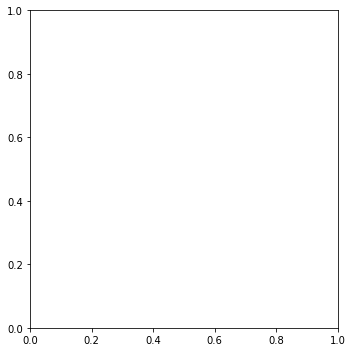

In [12]:
path = "/content/drive/MyDrive/GSOC_CSV/Sequential/"
image_path = "/content/Sequential/"
list_files = os.listdir(path)
for z in tqdm(range(len(list_files))):
  name = list_files[z]
  df = csv2df(path+name)
  xs = []
  ys = []
  for index,row in df.iterrows():
    x,y = row['Left_Hand']
    xs.append(x)
    y = abs(1-y)
    ys.append(y)
  
  xr = []
  yr = []
  for index,row in df.iterrows():
    x,y = row['Right_Hand']
    xr.append(x)
    y = abs(1-y)
    yr.append(y)

  index = []
  for i in range(len(xs)):
    if xs[i] == 0:
      index.append(i)
    if ys[i] ==0:
      if i not in index:
        index.append(i)
  index.sort(reverse=True)
  for i in index:
    xs.pop(i)
    ys.pop(i)

  index = []
  for i in range(len(xr)):
    if xr[i] == 0:
      index.append(i)
    if yr[i] ==0:
      if i not in index:
        index.append(i)

  index.sort(reverse=True)
  for i in index:
    xr.pop(i)
    yr.pop(i)

  color1=mcp.gen_color(cmap="YlOrRd",n=len(xs))
  color2=mcp.gen_color(cmap="Purples",n=len(xs))

  plt.rcParams["figure.figsize"] = [5, 5]
  plt.rcParams["figure.autolayout"] = True

  plt.xlim(xmin=0)
  plt.xlim(xmax=1)

  plt.ylim(ymin=0)
  plt.ylim(ymax=1)
  for i in range(len(xs)-2):
    plt.plot(xs[i:i+2], ys[i:i+2], ',', linestyle="solid", c=color1[i])
    plt.plot(xr[i:i+2], yr[i:i+2], ',', linestyle="solid", c=color2[i])
  # ax=plt.gca()
  # ax.get_xaxis().set_visible(False)
  # ax.get_yaxis().set_visible(False)
  plt.show
  plt.savefig(image_path+ str(z) +'.png', dpi=300, bbox_inches='tight')
  plt.clf()

In [ ]:
xs

[]

In [ ]:
xr = []
yr = []
for index,row in df.iterrows():
  x,y = row['Right_Hand']
  xr.append(x)
  y = abs(1-y)
  yr.append(y)

In [ ]:
index = []
for i in range(len(xs)):
  if xs[i] == 0:
    index.append(i)
  if ys[i] ==0:
    if i not in index:
      index.append(i)

for i in index:
  xs.pop(i)
  ys.pop(i)

NameError: ignored

In [ ]:
index = []
for i in range(len(xr)):
  if xr[i] == 0:
    index.append(i)
  if yr[i] ==0:
    if i not in index:
      index.append(i)
index.sort(reverse=True)
for i in index:
  xr.pop(i)
  yr.pop(i)

In [ ]:
color1=mcp.gen_color(cmap="YlOrRd",n=len(xs))
color2=mcp.gen_color(cmap="Purples",n=len(xs))

In [ ]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

<function matplotlib.pyplot.show>

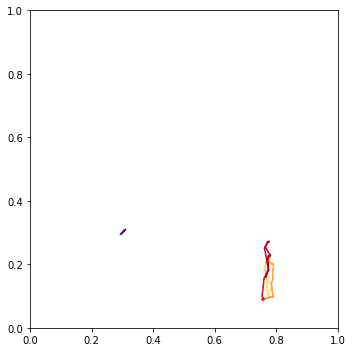

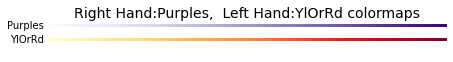

In [ ]:
plot_color_gradients('Right Hand:Purples,  Left Hand:YlOrRd',
                     ['Purples','YlOrRd'])

# ViT

In [4]:
model = CCT(
        img_size=1470,
        patch_size=5,
        in_channels=4,
        seq_pool=True,
        embedding_dim=64,
        num_layers=1,
        head_dim=96,
        num_heads=1,
        mlp_ratio=4.0,
        n_classes=3,
        p_dropout=0.1,
        attn_dropout=0.1,
        drop_path=0.1,
        positional_embedding="learnable",
        decoder_config=(
            64,
            128,
        ),
        pooling_kernel_size=3,
        pooling_stride=2,
        pooling_padding=1
    )

In [5]:
labels = []
a = []

In [7]:
# Sequential
# Deictic
# Demarcative

In [8]:
path = "/content/drive/MyDrive/GSOC_Images/Demarcative/"
list_dir = os.listdir(path)

for i in tqdm(range(len(list_dir))):
  img = Image.open(path+list_dir[i])
  image = convert_tensor(img)
  labels.append(0)
  a.append(image)

100%|██████████| 67/67 [00:04<00:00, 15.98it/s]


In [9]:
images = torch.stack(a,dim=0)
images.shape

torch.Size([224, 4, 1470, 1470])

In [10]:
labels = torch.tensor(labels)

In [7]:
# images2 = torch.load("/content/drive/MyDrive/GSOC_Images/images.pt")

In [8]:
# labels = torch.load("/content/drive/MyDrive/GSOC_Images/labels.pt")

In [11]:
train_data = TensorDataset(images,labels)
train_dataloader = DataLoader(train_data, batch_size=1, shuffle=True)

In [17]:
import torch.optim as optim
from tqdm import tqdm
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-3)

In [ ]:
model_preds = []
true_preds = []
for epoch in range(1):  # loop over the dataset multiple times
    print("The current epoch is ", epoch)
    count=0
    preds = []
    lab = []
    running_loss = 0.0
    for step, batch in enumerate(tqdm(train_dataloader, desc="Iteration")):
        count+=1
        image,label = batch
        output = model(image)
        model_preds.append(output)
        true_preds.append(label)

        # loss = criterion(output, label)

        # running_loss += loss.item()

        # loss.backward()
        # optimizer.step()
        # optimizer.zero_grad()
    print(f"The current loss is {running_loss}")

print('Finished Training')